In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

# Set the style for plots
sns.set_style('whitegrid')

# Enable inline plots
%matplotlib inline

In [2]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display basic information about the dataset
print("Dataset shape:", iris_df.shape)
print("\nFirst 5 rows of the dataset:")
iris_df.head()

Dataset shape: (150, 5)

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print("1. Features and their types:")
iris_df.dtypes

1. Features and their types:


sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

In [4]:
# Numerical features
numeric_features = iris_df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical features:", numeric_features)

# Categorical features
categorical_features = iris_df.select_dtypes(include=['category']).columns.tolist()
print("\nCategorical features:", categorical_features)

Numerical features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Categorical features: ['species']


2. Creating histograms for feature distributions...


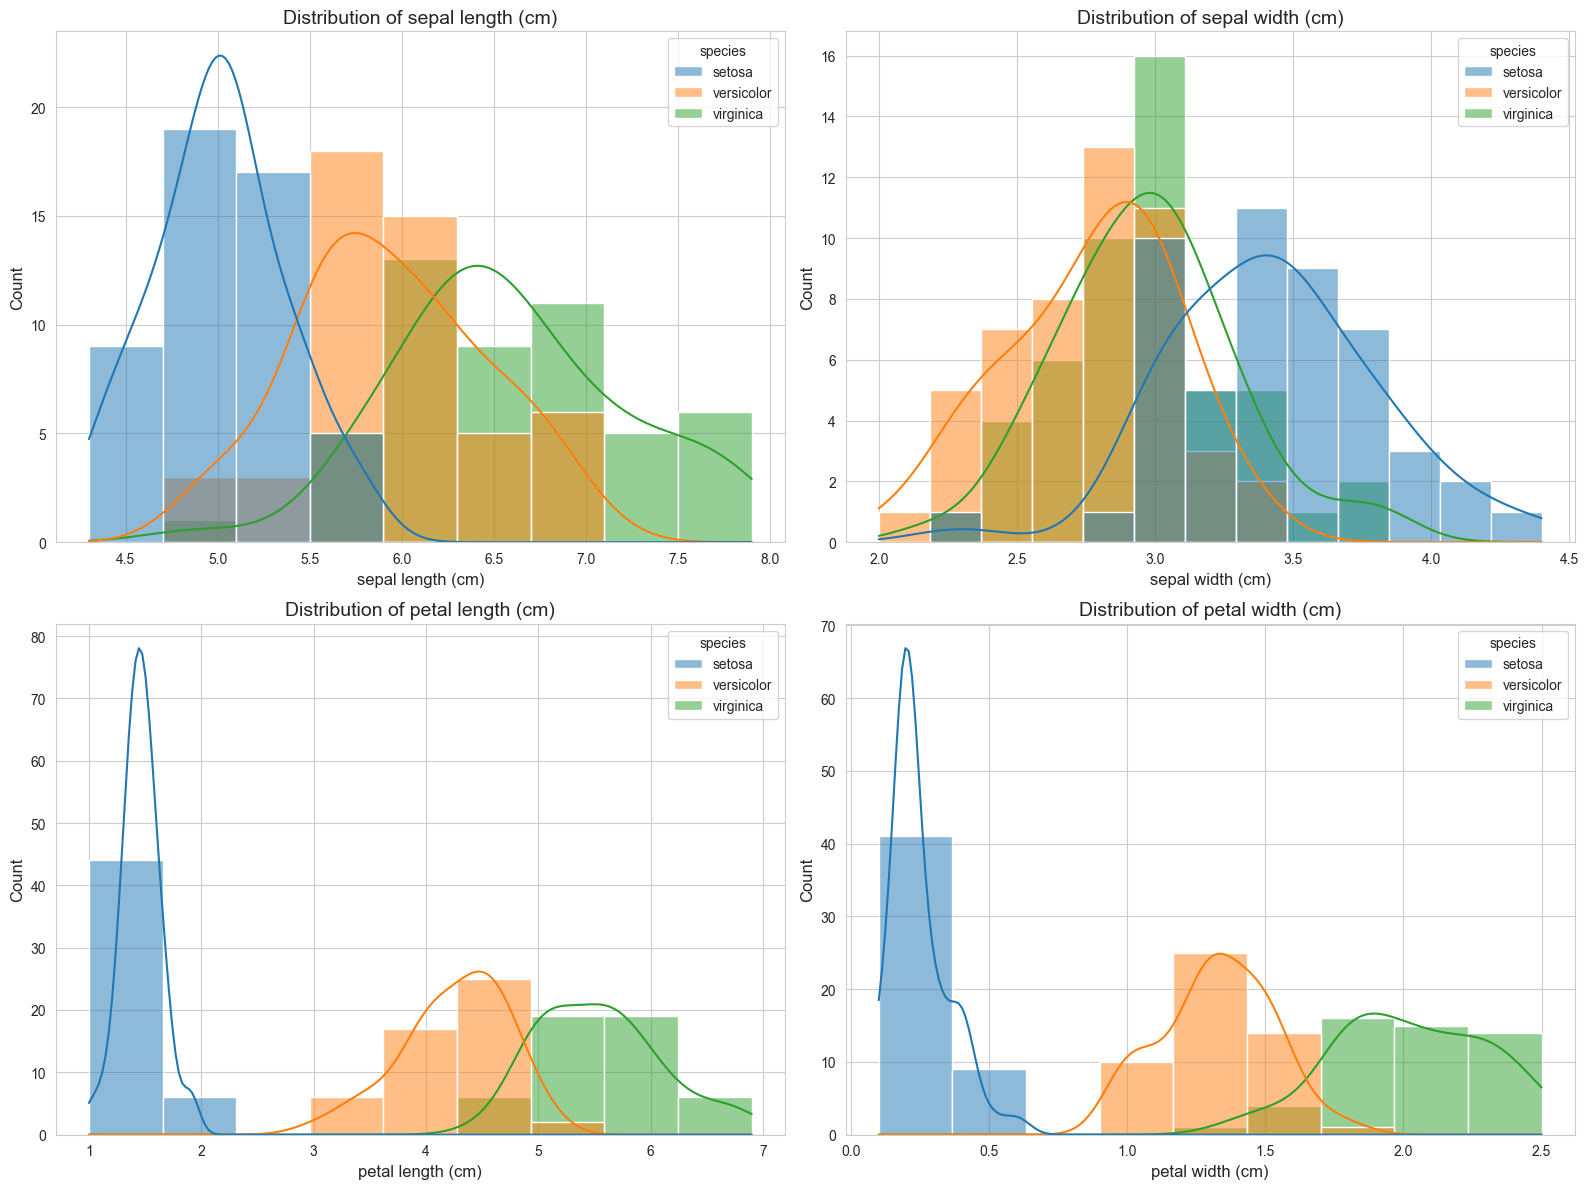

In [5]:
print("2. Creating histograms for feature distributions...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=iris_df, x=feature, hue='species', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

3. Creating boxplots for feature distributions...


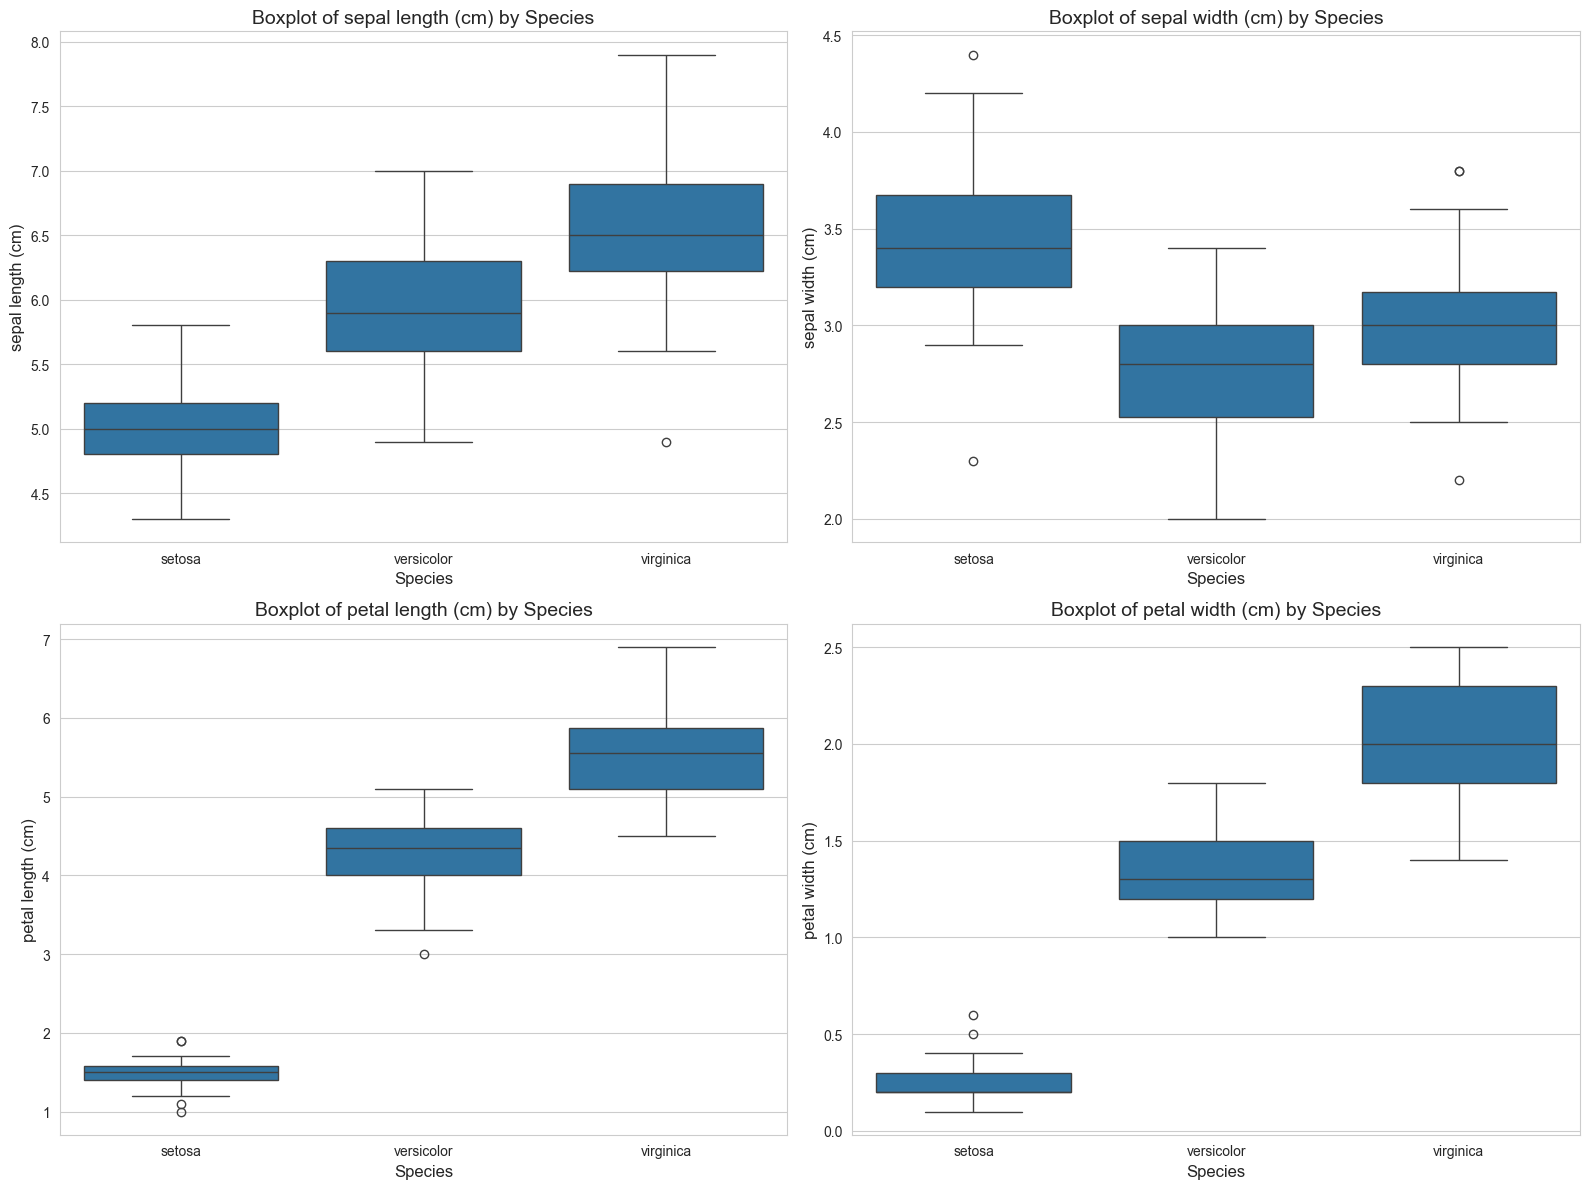

In [6]:
print("3. Creating boxplots for feature distributions...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x='species', y=feature, data=iris_df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Species', fontsize=14)
    axes[i].set_xlabel('Species', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

In [7]:
print("4. Distribution comparisons and outliers:")

# Function to identify outliers using IQR method
def find_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

4. Distribution comparisons and outliers:


In [8]:
# Check for outliers in each numerical feature
for feature in numeric_features:
    print(f"\nOutliers in {feature}:")
    outliers = find_outliers(iris_df, feature)
    if len(outliers) > 0:
        print(f"Number of outliers: {len(outliers)}")
        print(outliers[[feature, 'species']])
    else:
        print("No outliers detected")


Outliers in sepal length (cm):
No outliers detected

Outliers in sepal width (cm):
Number of outliers: 4
    sepal width (cm)     species
15               4.4      setosa
32               4.1      setosa
33               4.2      setosa
60               2.0  versicolor

Outliers in petal length (cm):
No outliers detected

Outliers in petal width (cm):
No outliers detected


In [9]:
# Feature correlation analysis
print("Feature correlation matrix:")
correlation_matrix = iris_df[numeric_features].corr()
correlation_matrix

Feature correlation matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


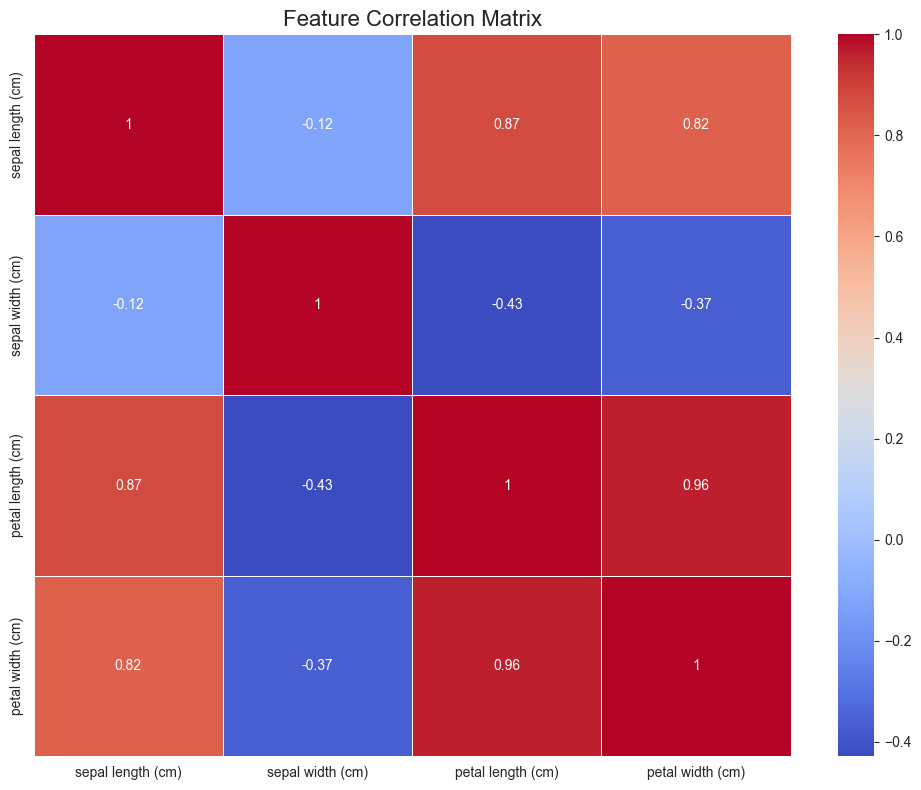

In [10]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
# Feature distribution summary
print("Feature distribution summary:")
iris_df[numeric_features].describe()

Feature distribution summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Feature distribution by species
print("Feature statistics by species:")
iris_df.groupby('species')[numeric_features].agg(['mean', 'std', 'min', 'max'])

Feature statistics by species:


/var/folders/c3/02z5_v456blb2nhq7w9995kw0000gn/T/ipykernel_2972/3875164837.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris_df.groupby('species')[numeric_features].agg(['mean', 'std', 'min', 'max'])


sepal length (cm)                     sepal width (cm)            \
                        mean       std  min  max             mean       std   
species                                                                       
setosa                 5.006  0.352490  4.3  5.8            3.428  0.379064   
versicolor             5.936  0.516171  4.9  7.0            2.770  0.313798   
virginica              6.588  0.635880  4.9  7.9            2.974  0.322497   

                     petal length (cm)                     petal width (cm)  \
            min  max              mean       std  min  max             mean   
species                                                                       
setosa      2.3  4.4             1.462  0.173664  1.0  1.9            0.246   
versicolor  2.0  3.4             4.260  0.469911  3.0  5.1            1.326   
virginica   2.2  3.8             5.552  0.551895  4.5  6.9            2.026   

                                
                 std  min  max  
species                         
setosa      0.105386  0.1  0.6  
versicolor  0.197753  1.0  1.8  
virginica   0.274650  1.4  2.5

<Figure size 1200x1000 with 0 Axes>

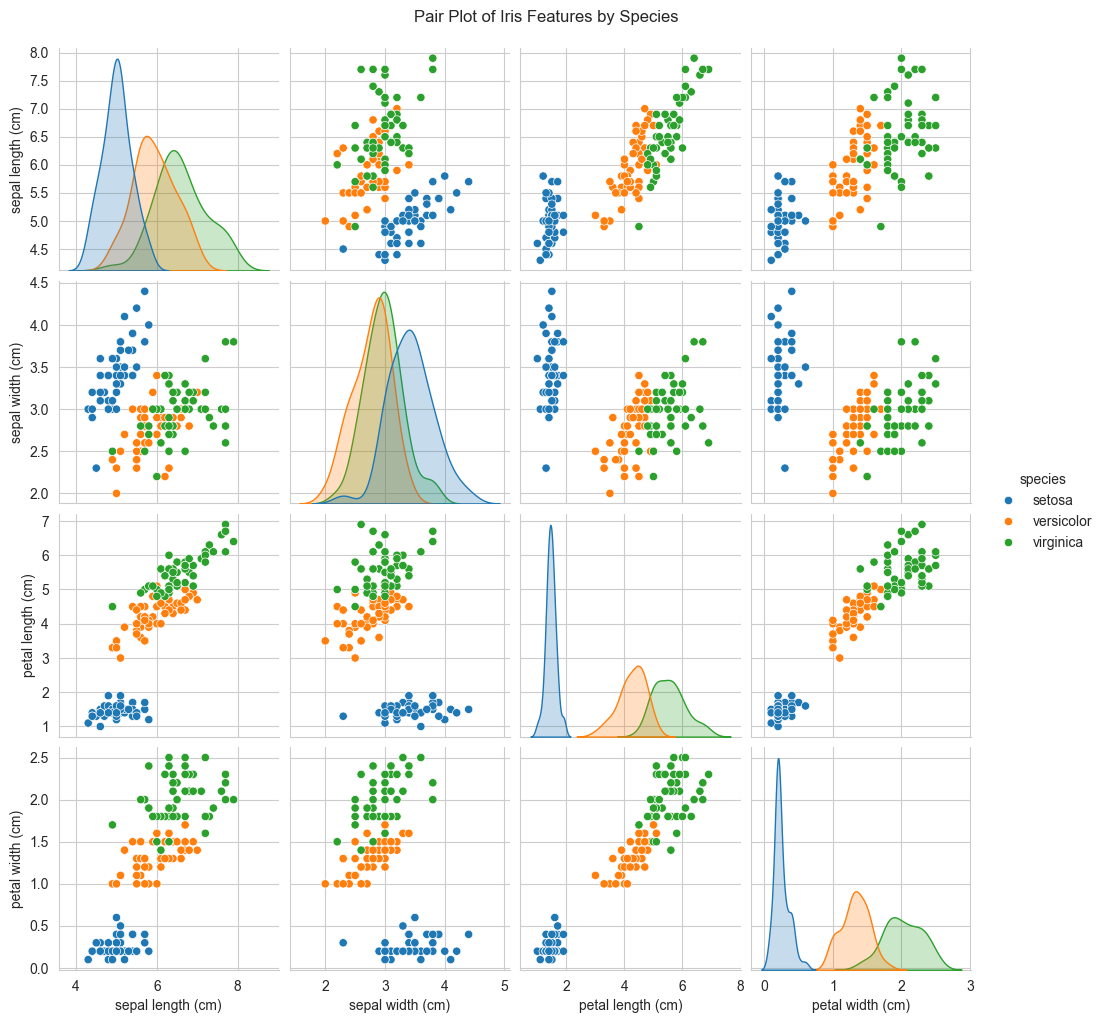

In [13]:
# Create pair plot for all features
plt.figure(figsize=(12, 10))
sns.pairplot(iris_df, hue='species', height=2.5)
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()